### Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

In [4]:
df=pd.read_csv('file:///C:/Users/RIKKI/Desktop/Notes/Datasets/insurance_part2_data.csv')


In [5]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [6]:
#There are few object datatypes. We have to change it into int as CART,RF model in python takes only int

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [7]:
df.isnull().sum()  #No null values

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [8]:
df.duplicated().sum()  #139 duplicated values. Let us explore those duplicated values

139

In [9]:

#By looking at the rows, we can see that although duplicated() is returning 139 duplicated rows but looking at the type of data
#theres is possibilty that duplication may occur amongs the data. As this data consists of user data, there may be a chance
#that features corresponding to 2 persons may be equal. 
#Hence we will not be dropping this duplicates.
df[df.duplicated()] 

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.00,Online,27,60.00,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.00,Online,5,20.00,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.00,Online,11,19.00,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.00,Online,2,20.00,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.00,Online,5,20.00,Customised Plan,ASIA
473,36,EPX,Travel Agency,No,0.00,Online,26,24.00,Customised Plan,ASIA
524,36,EPX,Travel Agency,No,0.00,Online,3,10.00,Cancellation Plan,ASIA
540,33,C2B,Airlines,Yes,54.00,Online,365,216.00,Silver Plan,ASIA
567,36,EPX,Travel Agency,No,0.00,Online,19,20.00,Customised Plan,ASIA
569,36,EPX,Travel Agency,No,0.00,Online,14,20.00,Customised Plan,ASIA


In [10]:
df.describe()


,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [11]:
df.drop(columns=['Agency_Code','Age'],axis=1,inplace=True) #As Age,Agency Code column is also of no use , we will drop it 

In [12]:
df.head()

,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 187.6+ KB


In [14]:
print(df['Type'].unique())
print(df['Destination'].unique())
print(df['Product Name'].unique())
print(df['Channel'].unique())

['Airlines' 'Travel Agency']
['ASIA' 'Americas' 'EUROPE']
['Customised Plan' 'Cancellation Plan' 'Bronze Plan' 'Silver Plan'
 'Gold Plan']
['Online' 'Offline']


In [15]:
df['Claimed'].value_counts(normalize=True) #Not a class imbalanced problem 

No     0.692
Yes    0.308
Name: Claimed, dtype: float64

In [16]:
from scipy.stats import zscore #Importing Z score modules

In [17]:
df1=df[['Commision','Sales','Duration']]  #Creating new dataset
df1.head() 

,Commision,Sales,Duration
0,0.70,2.51,7
1,0.00,20.00,34
2,5.94,9.90,3
3,0.00,26.00,4
4,6.30,18.00,53


In [18]:
df1=df1.apply(zscore)  #Applying zscore on new dataset
df1.head()

,Commision,Sales,Duration
0,-0.542807,-0.816433,-0.470051
1,-0.570282,-0.569127,-0.268605
2,-0.337133,-0.711940,-0.499894
3,-0.570282,-0.484288,-0.492433
4,-0.323003,-0.597407,-0.126846


In [19]:
#Assuming the distribution to be normally distributed, how many of records are above 3 SD. We will be treating those records
#whose zscore is above 3 SD.

df1[df1['Commision'] > 3].count()

Commision    55
Sales        55
Duration     55
dtype: int64

In [20]:
df1[df1['Sales'] > 3].count()


Commision    56
Sales        56
Duration     56
dtype: int64

In [21]:
df1[df1['Duration'] > 3].count()


Commision    1
Sales        1
Duration     1
dtype: int64

In [22]:
for col in df1.columns:
    df1[col]=np.where(df1[col] > 3,3,df1[col] )    #Treating outliers by changing the zscore to 3 ,whereever zscore>3
    df1[col]=np.where(df1[col] < -3,-3,df1[col] )  #Treating outliers by changing the zscore to -3 ,whereever zscore<3
    
#Again run the above commands to check the counts. The count should be coming zero.

In [23]:
df1[['Type','Claimed','Channel','Product Name','Destination']]=df[['Type','Claimed','Channel','Product Name','Destination']]

#Importing rest other columns from original dataset into new dataframe.

In [24]:
df1.head()

,Commision,Sales,Duration,Type,Claimed,Channel,Product Name,Destination
0,-0.542807,-0.816433,-0.470051,Airlines,No,Online,Customised Plan,ASIA
1,-0.570282,-0.569127,-0.268605,Travel Agency,No,Online,Customised Plan,ASIA
2,-0.337133,-0.711940,-0.499894,Travel Agency,No,Online,Customised Plan,Americas
3,-0.570282,-0.484288,-0.492433,Travel Agency,No,Online,Cancellation Plan,ASIA
4,-0.323003,-0.597407,-0.126846,Airlines,No,Online,Bronze Plan,ASIA


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
Commision       3000 non-null float64
Sales           3000 non-null float64
Duration        3000 non-null float64
Type            3000 non-null object
Claimed         3000 non-null object
Channel         3000 non-null object
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(3), object(5)
memory usage: 187.6+ KB


In [26]:
for i in df1.columns:      
    if df1[i].dtype == 'object':
        df1[i]=pd.Categorical(df1[i]).codes
 #Treating the columns whose datatype is stored as object. We will be changing into int and will be assigning some codes.   

In [27]:
print(df['Type'].unique())
print(df['Destination'].unique())
print(df['Product Name'].unique())
print(df['Channel'].unique())
print(df['Claimed'].unique())

['Airlines' 'Travel Agency']
['ASIA' 'Americas' 'EUROPE']
['Customised Plan' 'Cancellation Plan' 'Bronze Plan' 'Silver Plan'
 'Gold Plan']
['Online' 'Offline']
['No' 'Yes']


In [28]:
print(pd.Categorical(df['Type'].unique()).codes)
print(pd.Categorical(df['Destination'].unique()).codes)
print(pd.Categorical(df['Product Name'].unique()).codes)
print(pd.Categorical(df['Channel'].unique()).codes)
print(pd.Categorical(df['Claimed'].unique()).codes)

[0 1]
[0 1 2]
[2 1 0 4 3]
[1 0]
[0 1]


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
Commision       3000 non-null float64
Sales           3000 non-null float64
Duration        3000 non-null float64
Type            3000 non-null int8
Claimed         3000 non-null int8
Channel         3000 non-null int8
Product Name    3000 non-null int8
Destination     3000 non-null int8
dtypes: float64(3), int8(5)
memory usage: 85.0 KB


##### Visualization

In [69]:
df1.head()

,Commision,Sales,Duration,Type,Channel,Product Name,Destination
0,-0.542807,-0.816433,-0.470051,0,1,2,0
1,-0.570282,-0.569127,-0.268605,1,1,2,0
2,-0.337133,-0.711940,-0.499894,1,1,2,1
3,-0.570282,-0.484288,-0.492433,1,1,1,0
4,-0.323003,-0.597407,-0.126846,0,1,0,0


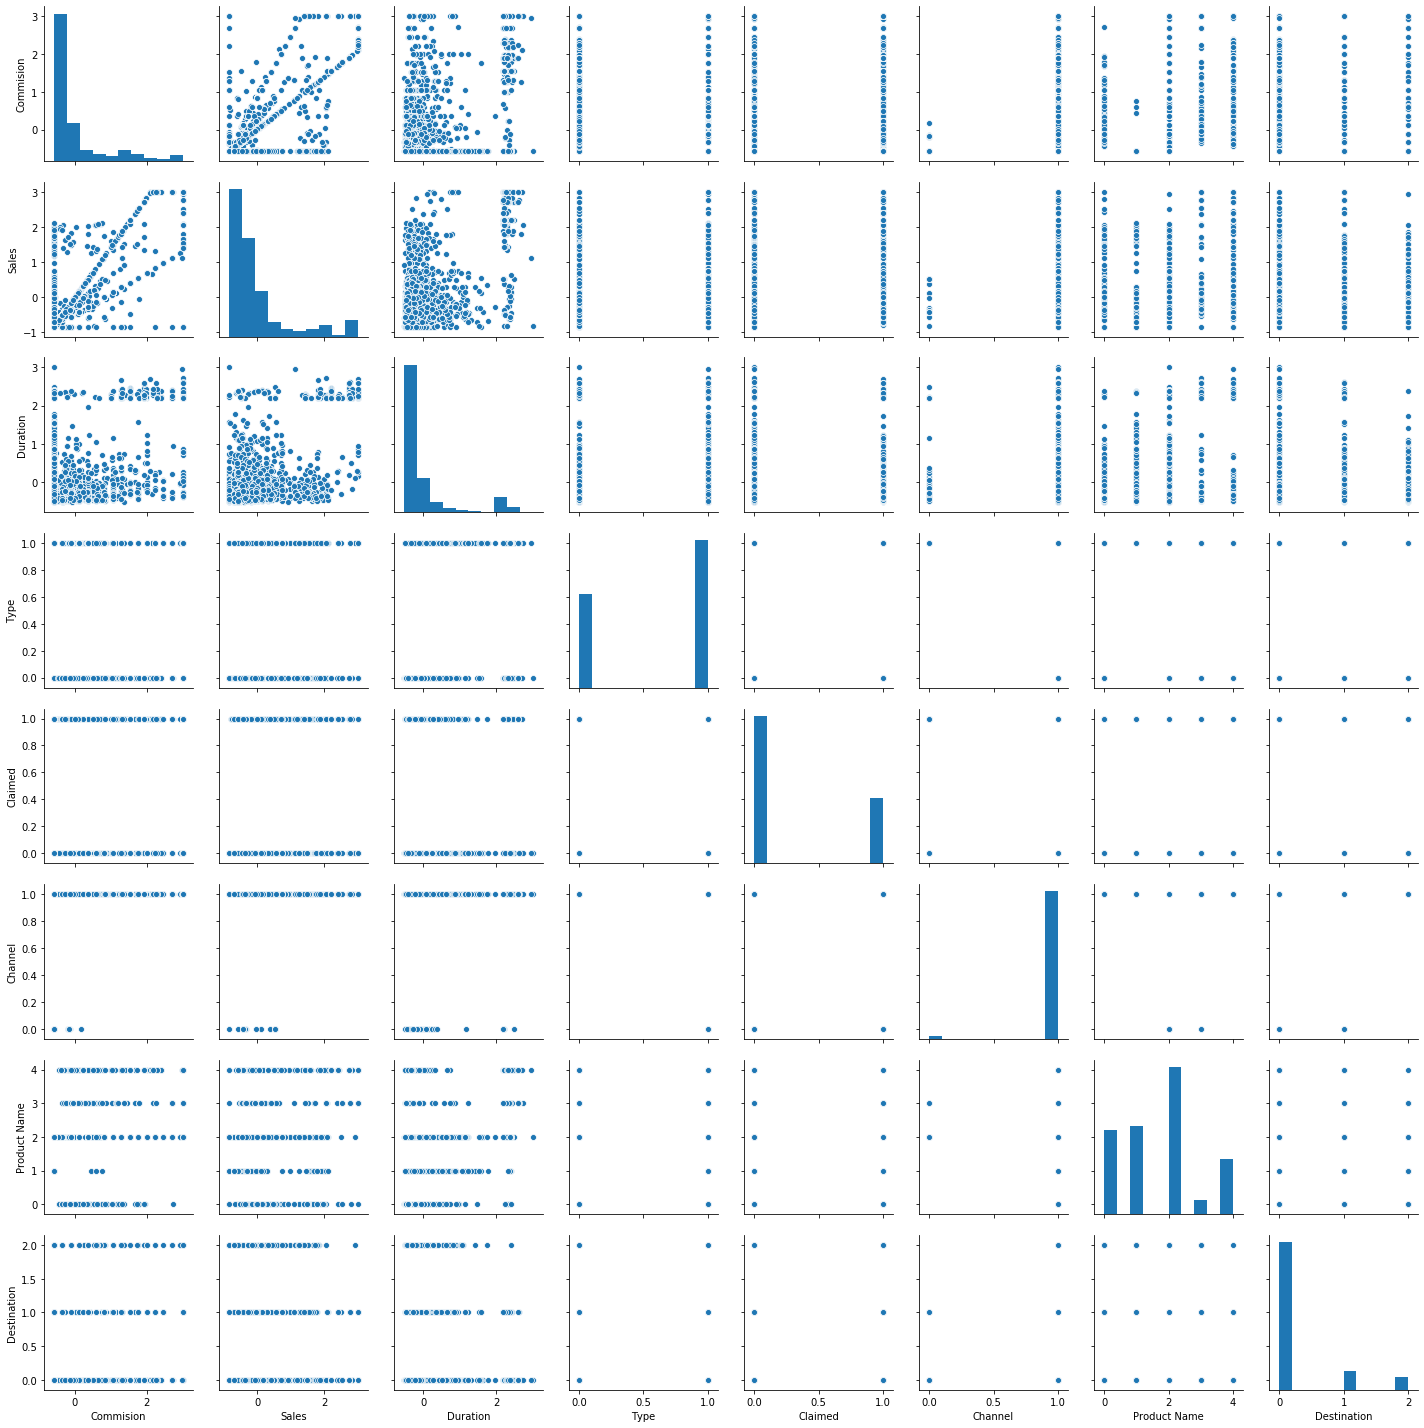

In [55]:
sns.pairplot(df1)  #There's a small correlation between Commission and Sales

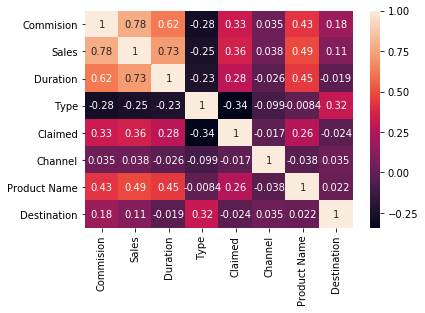

In [56]:
sns.heatmap(df1.corr(),annot=True) #There's a small correlation between Commission and Sale & Duration & Sales. 

In [70]:
X=df1.drop('Claimed',axis=1)   #Dropping of Target Variable

KeyError: "['Claimed'] not found in axis"

In [31]:
Y=df1.pop('Claimed')          #Extracting Target variable.

In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
Commision       3000 non-null float64
Sales           3000 non-null float64
Duration        3000 non-null float64
Type            3000 non-null int8
Channel         3000 non-null int8
Product Name    3000 non-null int8
Destination     3000 non-null int8
dtypes: float64(3), int8(4)
memory usage: 82.1 KB


In [33]:
Y.count()

3000

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [62]:
from sklearn.model_selection import train_test_split  #Used for splitting into test train dataset 

In [63]:
X_train,X_test,train_labels,test_labels=train_test_split(X,Y,test_size=0.20,random_state=1) 

#80% training and 20% testing data

In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 268 to 1061
Data columns (total 7 columns):
Commision       2400 non-null float64
Sales           2400 non-null float64
Duration        2400 non-null float64
Type            2400 non-null int8
Channel         2400 non-null int8
Product Name    2400 non-null int8
Destination     2400 non-null int8
dtypes: float64(3), int8(4)
memory usage: 84.4 KB


In [66]:
train_labels.value_counts(normalize=True)   #Not a case of class imbalance problem.

0    0.692083
1    0.307917
Name: Claimed, dtype: float64

In [76]:
from sklearn.tree import DecisionTreeClassifier as dtc                            #Import CART module

In [66]:
dt_model=dtc(criterion='gini')                                                    #Creation of simple CART model 

In [67]:
dt_model.fit(X_train,train_labels)                                      #Fitting of model into training and testing dataset 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [68]:
from sklearn import tree

In [69]:
train_char_label = ['No','Yes']

In [70]:
Credit_Tree_File =open('d:\credit_tree.dot','w')

In [71]:
tree.export_graphviz(dt_model,out_file=Credit_Tree_File,feature_names=list(X_train),class_names=train_char_label)

In [72]:
Credit_Tree_File.close()

In [73]:
from sklearn.model_selection import GridSearchCV  #CV= cross validation 

In [74]:
param_grid={
    'max_depth':[5,7,9],
    'min_samples_split':[15,30,45],
    'min_samples_leaf':[5,10,15],
    
}

In [77]:
dt_model=dtc()

In [78]:
grid_search=GridSearchCV(estimator=dt_model,param_grid=param_grid
                         ,cv=5)

In [79]:
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 7, 9],
                         'min_samples_leaf': [5, 10, 15],
                         'min

In [80]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 15}

In [81]:
reg_dt_model=grid_search.best_estimator_

In [82]:
reg_dt_model.fit(X_train,train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [175]:
Credit_Tree_File =open('d:\credit_tree.dot','w')

In [176]:
tree.export_graphviz(reg_dt_model,out_file=Credit_Tree_File,feature_names=list(X_train),class_names=train_char_label)

In [177]:
Credit_Tree_File.close()

In [179]:
reg_dt_model.feature_importances_

array([0.07466231, 0.18678189, 0.04150516, 0.        , 0.01657592,
       0.68047472, 0.        ])

<BarContainer object of 7 artists>

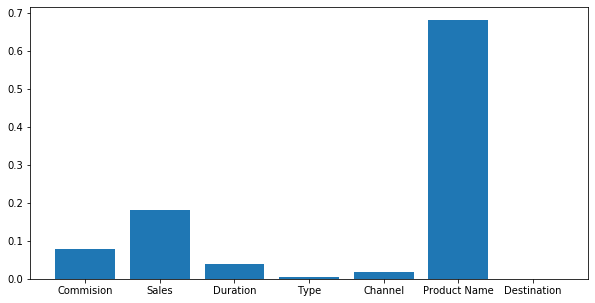

In [83]:
plt.figure(figsize=(10,5))
plt.bar( [col for col in X_train.columns] ,reg_dt_model.feature_importances_)


In [181]:
print(pd.DataFrame(reg_dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))  
#Type,Channel,Destination is least important while considering the outcome
#The most dominating factor is Product Name.

                   Imp
Commision     0.074662
Sales         0.186782
Duration      0.041505
Type          0.000000
Channel       0.016576
Product Name  0.680475
Destination   0.000000


In [182]:
ytrain_predict=reg_dt_model.predict(X_train)
ytest_predict=reg_dt_model.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

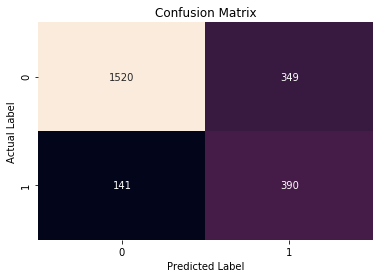

In [184]:
confusion_matrix(ytrain_predict,train_labels)
sns.heatmap(confusion_matrix(ytrain_predict,train_labels),annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

#0 denotes no claim
#1 denotes claimed

In [185]:
print(classification_report(ytrain_predict,train_labels))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1869
           1       0.53      0.73      0.61       531

    accuracy                           0.80      2400
   macro avg       0.72      0.77      0.74      2400
weighted avg       0.83      0.80      0.81      2400



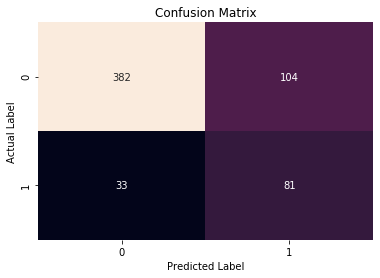

In [186]:
confusion_matrix(ytest_predict,test_labels)
sns.heatmap(confusion_matrix(ytest_predict,test_labels),annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [187]:
print(classification_report(ytest_predict,test_labels))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       486
           1       0.44      0.71      0.54       114

    accuracy                           0.77       600
   macro avg       0.68      0.75      0.69       600
weighted avg       0.83      0.77      0.79       600



In [37]:
from sklearn.metrics import roc_auc_score,roc_curve

In [189]:
probs1=reg_dt_model.predict_proba(X_train)
probs1=probs1[:,1]
roc_auc_score(train_labels,probs1)

0.8314965062538748

In [190]:
probs2=reg_dt_model.predict_proba(X_test)
probs2=probs2[:,1]
roc_auc_score(test_labels,probs2)

0.7907261478345816

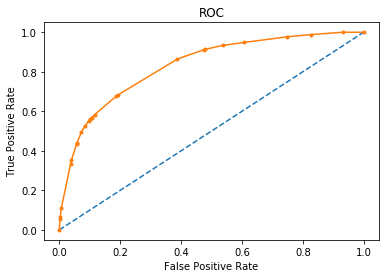

In [191]:
fpr,tpr,thresholds=roc_curve(train_labels,probs1)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()

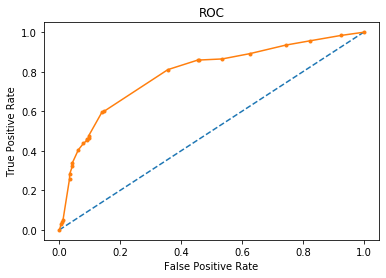

In [192]:
fpr,tpr,thresholds=roc_curve(test_labels,probs2)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()

### RANDOM CLASSIFICATION

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rfcl=RandomForestClassifier() 

In [86]:
param_grid_rfcl ={
    'n_estimators':[50,100],
    'max_features':[4,5],
    'max_depth':[8,10,12],
    'min_samples_split':[15,30,45],
    'min_samples_leaf':[5,10,15]
}



In [87]:
grid_search_rfcl=GridSearchCV(estimator=rfcl,param_grid=param_grid_rfcl
                         ,cv=5)

In [88]:
grid_search_rfcl.fit(X_train,train_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [90]:
grid_search_rfcl.best_params_

{'max_depth': 8,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 45,
 'n_estimators': 100}

In [91]:
grid_search_reg_rfcl=grid_search_rfcl.best_estimator_

In [92]:
grid_search_reg_rfcl.fit(X_train,train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=45,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
print(pd.DataFrame(grid_search_reg_rfcl.feature_importances_,columns=['Imp'],index=X_train.columns))  

                   Imp
Commision     0.223016
Sales         0.210871
Duration      0.113141
Type          0.098019
Channel       0.007731
Product Name  0.330002
Destination   0.017220


<BarContainer object of 7 artists>

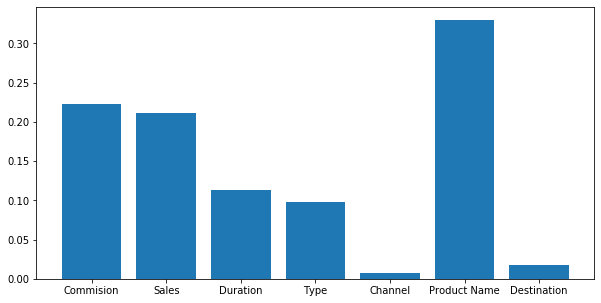

In [94]:
plt.figure(figsize=(10,5))
plt.bar( [col for col in X_train.columns] ,grid_search_reg_rfcl.feature_importances_)

#Channel, Destination is least important while considering the outcome. The most dominating factor is Product Name, 
#Commission, Sales, Duration, and Type. We can confirm this very well by looking at the plot. Unlike CART ,
#here many of the features are dependent on the final outcomes.

In [118]:
ytrain_rf_predict=grid_search_reg_rfcl.predict(X_train)
ytest_rf_predict=grid_search_reg_rfcl.predict(X_test)

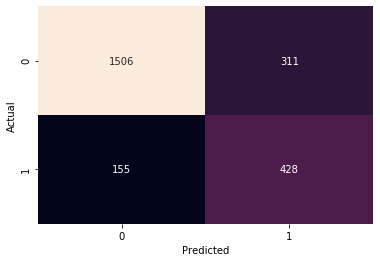

In [119]:
sns.heatmap(confusion_matrix(ytrain_rf_predict,train_labels),annot=True,fmt='d',cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

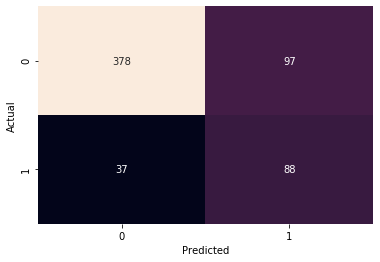

In [120]:
sns.heatmap(confusion_matrix(ytest_rf_predict,test_labels),annot=True,fmt='d',cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [121]:
print(classification_report(ytrain_rf_predict,train_labels))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1817
           1       0.58      0.73      0.65       583

    accuracy                           0.81      2400
   macro avg       0.74      0.78      0.76      2400
weighted avg       0.83      0.81      0.81      2400



In [122]:
print(classification_report(ytest_rf_predict,test_labels))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       475
           1       0.48      0.70      0.57       125

    accuracy                           0.78       600
   macro avg       0.69      0.75      0.71       600
weighted avg       0.82      0.78      0.79       600



In [123]:
probs_rf_train=grid_search_reg_rfcl.predict_proba(X_train)
probs_rf_train=probs_rf_train[:,1]
roc_auc_score(train_labels,probs_rf_train)

0.8690580449848837

In [124]:
probs_rf_test=grid_search_reg_rfcl.predict_proba(X_test)
probs_rf_test=probs_rf_test[:,1]
roc_auc_score(test_labels,probs_rf_test)

0.8222663627482905

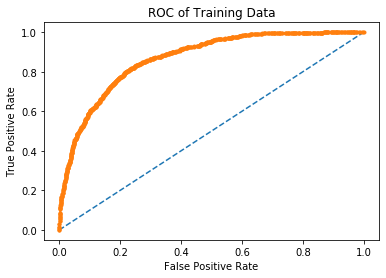

In [125]:
fpr,tpr,thresholds=roc_curve(train_labels,probs_rf_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC of Training Data')
plt.show()

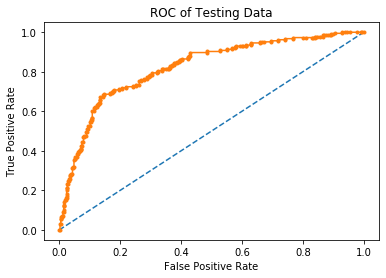

In [126]:
fpr,tpr,thresholds=roc_curve(test_labels,probs_rf_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC of Testing Data')
plt.show()

### Neural Networks

In [3]:
from sklearn.neural_network import MLPClassifier

In [44]:
clf_reg=MLPClassifier()

In [45]:
param_grid_clf={
    'hidden_layer_sizes':[100,200],
    'max_iter':[2000,3000],
    'learning_rate_init':[0.001,0.0001],
    'random_state':[1]
}

In [46]:
grid_search_clf=GridSearchCV(estimator=clf_reg,param_grid=param_grid_clf,cv=5)

In [47]:
grid_search_clf.fit(X_train,train_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'hidden_layer_sizes': [100, 200],
       

In [48]:
grid_search_clf.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_iter=2000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [49]:
grid_search_clf.best_params_

{'hidden_layer_sizes': 100,
 'learning_rate_init': 0.001,
 'max_iter': 2000,
 'random_state': 1}

In [50]:
clf=grid_search_clf.best_estimator_

In [199]:
#clf=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=150, learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=1e-07,
              validation_fraction=0.1, verbose=False, warm_start=False)
#Verbose=True means output has to be printed or not , ran_state= same synaptic weights get assigned to each 
#tol=Smaller the tol more the accuracy

In [51]:
clf.fit(X_train,train_labels)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_iter=2000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [52]:
test_clf_pred=clf.predict(X_test)
train_clf_pred=clf.predict(X_train)

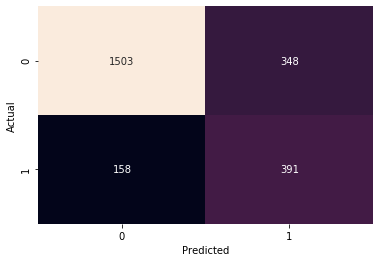

In [53]:
sns.heatmap(confusion_matrix(train_clf_pred,train_labels),annot=True,fmt='d',cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [54]:
print(classification_report(train_clf_pred,train_labels))

              precision    recall  f1-score   support

           0       0.90      0.81      0.86      1851
           1       0.53      0.71      0.61       549

    accuracy                           0.79      2400
   macro avg       0.72      0.76      0.73      2400
weighted avg       0.82      0.79      0.80      2400



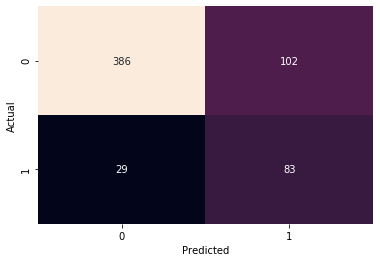

In [55]:

sns.heatmap(confusion_matrix(test_clf_pred,test_labels),annot=True,fmt='d',cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [56]:
print(classification_report(test_clf_pred,test_labels))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85       488
           1       0.45      0.74      0.56       112

    accuracy                           0.78       600
   macro avg       0.69      0.77      0.71       600
weighted avg       0.84      0.78      0.80       600



In [57]:
probs_clf_train=clf.predict_proba(X_train)
probs_clf_train=probs_clf_train[:,1]
roc_auc_score(train_labels,probs_clf_train)

0.8416351725772906

In [59]:
probs_clf_test=clf.predict_proba(X_test)
probs_clf_test=probs_clf_test[:,1]
roc_auc_score(test_labels,probs_clf_test)

0.8125626831650928

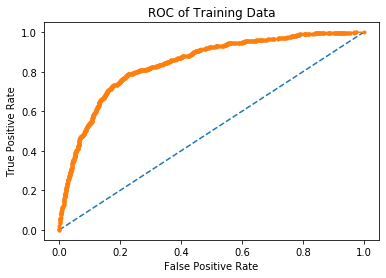

In [60]:
fpr,tpr,thresholds=roc_curve(train_labels,probs_clf_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC of Training Data')
plt.show()

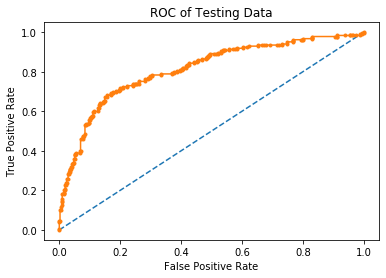

In [95]:
fpr,tpr,thresholds=roc_curve(test_labels,probs_clf_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC of Testing Data')
plt.show()

In [301]:
df1.head()

,Commision,Sales,Duration,Type,Claimed,Channel,Product Name,Destination
0,-0.556921,-0.829950,-0.478989,0,0,1,2,0
1,-0.584029,-0.584949,-0.280392,1,0,1,2,0
2,-0.353996,-0.726430,-0.508411,1,0,1,2,1
3,-0.584029,-0.500900,-0.501056,1,0,1,1,0
4,-0.340055,-0.612965,-0.140638,0,0,1,0,0


### 2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

#### 
Comparing all the model evaluation parameters for different models, RANDOM FOREST is performing best. AUC_SCORE , ACCURACY for both training and testing dataset is better in RF as compared to other models. 
Moreover as for this case, Type 1 error needs not be minimized as we do not want our model to incorrectly predict those customers who will ask for the claims in actual but our model will predict it won’t. 
Hence we should look for the greater precision as compared to recall. 

The second best model is Neural Networks. Model evaluation parameters for NN is quite near to RF .


### 2.5 Inference: Basis on these predictions, what are the business insights and recommendations

In [ ]:
#Looking at the feature importance from Random Forest, we can see that Channel, Destination is least important 
#while considering the outcome.


In [ ]:
#The most dominating factor is Product Name, Commission, Sales, Duration, and Type. We can confirm this very well by looking at the plot.
#Unlike CART , here many of the features are dependent on the final outcomes.

In [ ]:
#The insurance company can introduce few more attractive products which can attract customers as its the most dominating factors. 

In [ ]:
#As commission and sales are correlated to each other, the firm should increase the commission margin which in return can increase the sales as well.
#Duration is also an important factor hence firm should concentrate on providing long duration schemes.


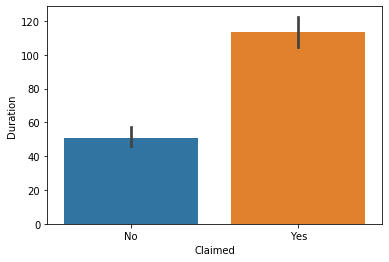

In [96]:
sns.barplot(df['Claimed'],df['Duration'])


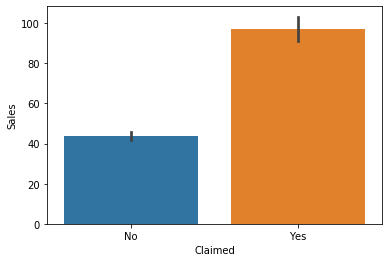

In [97]:
sns.barplot(df['Claimed'],df['Sales'])

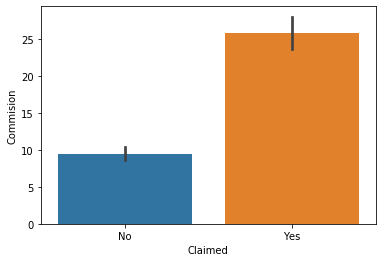

In [100]:
sns.barplot(df['Claimed'],df['Commision'])